### Importing model building libraries

In [ ]:
#ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#CNN
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### Image preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#Applying image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r"/content/dataset/Training",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_datagen.flow_from_directory(r"/content/dataset/Testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


### Model building

In [ ]:
#Intializing the model
model=Sequential()

In [ ]:
#Adding convolution layer (No. of filters, size of filter, input shape, activation=relu)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#Adding max pooling layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Adding flatten layer
model.add(Flatten())

The flatten layer provides output as input for ANN¯¸

In [ ]:
#ANN hidden layer
model.add(Dense(units=128,activation="relu"))

In [ ]:
#Adding output layer
model.add(Dense(units=4,activation="softmax"))

In [ ]:
#Compiling the model(loss function,optimizer, accuracy)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
#Fitting model
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data=x_test,validation_steps=10)

Epoch 1/5
39/39 [==============================] - 12s 295ms/step - loss: 1.9095 - accuracy: 0.3086 - val_loss: 1.2839 - val_accuracy: 0.3344
Epoch 2/5
39/39 [==============================] - 11s 276ms/step - loss: 1.0885 - accuracy: 0.5646 - val_loss: 1.0544 - val_accuracy: 0.6062
Epoch 3/5
39/39 [==============================] - 9s 238ms/step - loss: 0.9207 - accuracy: 0.6365 - val_loss: 0.8136 - val_accuracy: 0.6875
Epoch 4/5
39/39 [==============================] - 10s 236ms/step - loss: 0.7909 - accuracy: 0.6882 - val_loss: 0.8356 - val_accuracy: 0.6906
Epoch 5/5
39/39 [==============================] - 13s 346ms/step - loss: 0.7186 - accuracy: 0.7270 - val_loss: 0.6090 - val_accuracy: 0.7812


Steps per epoch = No. of samples in your training/batch size



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

For Convolution layer:

1. No. of filters *(input_channels*window_size+1)=Number of paramaters

For Dense layers:

1. Output_size*(input_size+1)==number_parameters

### Saving model

In [ ]:
model.save("animal.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Testing model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
#Loading model
import tensorflow as tf
model=tf.keras.models.load_model(r"/content/animal.h5",compile=False)

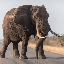

In [ ]:
#Loading an image
img=image.load_img(r"/content/elephant.jpeg",target_size=(64,64))
img

In [ ]:
#3D array of pixels
x=image.img_to_array(img)
x

array([[[219., 222., 227.],
        [219., 222., 227.],
        [219., 222., 227.],
        ...,
        [214., 217., 224.],
        [214., 217., 224.],
        [214., 217., 224.]],

       [[221., 224., 229.],
        [221., 224., 229.],
        [221., 224., 229.],
        ...,
        [216., 219., 226.],
        [216., 219., 226.],
        [216., 219., 226.]],

       [[222., 225., 230.],
        [222., 225., 230.],
        [222., 225., 230.],
        ...,
        [219., 222., 229.],
        [219., 222., 229.],
        [219., 222., 229.]],

       ...,

       [[174., 155., 141.],
        [172., 152., 141.],
        [172., 152., 145.],
        ...,
        [134., 125., 120.],
        [131., 122., 117.],
        [136., 127., 122.]],

       [[176., 157., 143.],
        [174., 154., 143.],
        [168., 148., 141.],
        ...,
        [131., 122., 117.],
        [128., 119., 114.],
        [137., 128., 123.]],

       [[174., 155., 141.],
        [171., 151., 140.],
        [170., 1

Since convolution layer is 4D, input data should be converted to 4D array while passimg for prediction

In [ ]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred=model.predict(x)
pred

1/1 [==============================] - 0s 151ms/step


array([[0., 0., 1., 0.]], dtype=float32)

In [ ]:
pred_class=np.argmax(pred,axis=1)
pred_class[0]

2

In [ ]:
index=["bear","crow","elephant","rat"]

In [ ]:
result=str(index[pred_class[0]])
result

'elephant'